In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Connection String**

In [2]:
import sqlalchemy
# Connect to database
PWD='root'
USR='root'
SQLALCHEMY_DATABASE_URI = 'mysql+pymysql://{}:{}@localhost:3306/moviesdb'.format(USR, PWD)
engine = sqlalchemy.create_engine(SQLALCHEMY_DATABASE_URI)


**Basic**

In [8]:
df = pd.read_sql("movies",engine)
print(df.head())
print(df.columns)
print(df.shape)

   movie_id                                        title   industry  \
0       101                             K.G.F: Chapter 2  Bollywood   
1       102  Doctor Strange in the Multiverse of Madness  Hollywood   
2       103                        Thor: The Dark World   Hollywood   
3       104                              Thor: Ragnarok   Hollywood   
4       105                      Thor: Love and Thunder   Hollywood   

   release_year  imdb_rating          studio  language_id  
0          2022          8.4   Hombale Films            3  
1          2022          7.0  Marvel Studios            5  
2          2013          6.8  Marvel Studios            5  
3          2017          7.9  Marvel Studios            5  
4          2022          6.8  Marvel Studios            5  
Index(['movie_id', 'title', 'industry', 'release_year', 'imdb_rating',
       'studio', 'language_id'],
      dtype='object')
(39, 7)


In [14]:

query = """
select *,
	case when unit ="Billions" then budget*1000
         when unit = "Thousands" then budget/1000
		 else budget
    end as budget_M,
    case when unit ="Billions" then revenue*1000
         when unit = "Thousands" then revenue/1000
		 else revenue
    end as revenue_M,
    if(currency = "USD",77,1) as converstion
 from moviesdb.financials
"""
df_fin = pd.read_sql(query,engine)
print(df_fin.head())
print(df_fin.columns)
print(df_fin.shape)

   movie_id  budget  revenue      unit currency  budget_M  revenue_M  \
0       101     1.0     12.5  Billions      INR    1000.0    12500.0   
1       102   200.0    954.8  Millions      USD     200.0      954.8   
2       103   165.0    644.8  Millions      USD     165.0      644.8   
3       104   180.0    854.0  Millions      USD     180.0      854.0   
4       105   250.0    670.0  Millions      USD     250.0      670.0   

   converstion  
0            1  
1           77  
2           77  
3           77  
4           77  
Index(['movie_id', 'budget', 'revenue', 'unit', 'currency', 'budget_M',
       'revenue_M', 'converstion'],
      dtype='object')
(40, 8)


In [34]:
df_fin['revenue_M_Inr'] = df_fin['revenue_M']*df_fin['converstion']
df_fin['budget_M_Inr'] = df_fin['budget_M']*df_fin['converstion']
df_fin['Profit_M_Inr'] = df_fin['revenue_M_Inr'] - df_fin['budget_M_Inr']
print(df_fin.head())

   movie_id  budget  revenue      unit currency  budget_M  revenue_M  \
0       101     1.0     12.5  Billions      INR    1000.0    12500.0   
1       102   200.0    954.8  Millions      USD     200.0      954.8   
2       103   165.0    644.8  Millions      USD     165.0      644.8   
3       104   180.0    854.0  Millions      USD     180.0      854.0   
4       105   250.0    670.0  Millions      USD     250.0      670.0   

   converstion  revenue_M_Inr  budget_M_Inr  Profit_M_Inr  
0            1        12500.0        1000.0       11500.0  
1           77        73519.6       15400.0       58119.6  
2           77        49649.6       12705.0       36944.6  
3           77        65758.0       13860.0       51898.0  
4           77        51590.0       19250.0       32340.0  


In [35]:
df_movie_fin_merge = pd.merge(df,df_fin,on='movie_id')
print(df_movie_fin_merge.head())
print(df_movie_fin_merge.shape)

   movie_id                                        title   industry  \
0       101                             K.G.F: Chapter 2  Bollywood   
1       102  Doctor Strange in the Multiverse of Madness  Hollywood   
2       103                        Thor: The Dark World   Hollywood   
3       104                              Thor: Ragnarok   Hollywood   
4       105                      Thor: Love and Thunder   Hollywood   

   release_year  imdb_rating          studio  language_id  budget  revenue  \
0          2022          8.4   Hombale Films            3     1.0     12.5   
1          2022          7.0  Marvel Studios            5   200.0    954.8   
2          2013          6.8  Marvel Studios            5   165.0    644.8   
3          2017          7.9  Marvel Studios            5   180.0    854.0   
4          2022          6.8  Marvel Studios            5   250.0    670.0   

       unit currency  budget_M  revenue_M  converstion  revenue_M_Inr  \
0  Billions      INR    1000.0 

In [36]:
query = """
select language_id,name as language from moviesdb.languages;
"""
df_movie_lan = pd.read_sql(query,engine)
df_movie_lan.columns

Index(['language_id', 'language'], dtype='object')

In [37]:
df_movie_fin_merge = pd.merge(df_movie_fin_merge,df_movie_lan,on='language_id')
print(df_movie_fin_merge.head())

   movie_id                                        title   industry  \
0       101                             K.G.F: Chapter 2  Bollywood   
1       102  Doctor Strange in the Multiverse of Madness  Hollywood   
2       103                        Thor: The Dark World   Hollywood   
3       104                              Thor: Ragnarok   Hollywood   
4       105                      Thor: Love and Thunder   Hollywood   

   release_year  imdb_rating          studio  language_id  budget  revenue  \
0          2022          8.4   Hombale Films            3     1.0     12.5   
1          2022          7.0  Marvel Studios            5   200.0    954.8   
2          2013          6.8  Marvel Studios            5   165.0    644.8   
3          2017          7.9  Marvel Studios            5   180.0    854.0   
4          2022          6.8  Marvel Studios            5   250.0    670.0   

       unit currency  budget_M  revenue_M  converstion  revenue_M_Inr  \
0  Billions      INR    1000.0 

In [38]:
print(df_movie_fin_merge[['industry','release_year','imdb_rating','studio','revenue_M_Inr','budget_M_Inr','language','Profit_M_Inr']].head())


    industry  release_year  imdb_rating          studio  revenue_M_Inr  \
0  Bollywood          2022          8.4   Hombale Films        12500.0   
1  Hollywood          2022          7.0  Marvel Studios        73519.6   
2  Hollywood          2013          6.8  Marvel Studios        49649.6   
3  Hollywood          2017          7.9  Marvel Studios        65758.0   
4  Hollywood          2022          6.8  Marvel Studios        51590.0   

   budget_M_Inr language  Profit_M_Inr  
0        1000.0  Kannada       11500.0  
1       15400.0  English       58119.6  
2       12705.0  English       36944.6  
3       13860.0  English       51898.0  
4       19250.0  English       32340.0  


In [29]:
df_movie_fin_merge['industry'].value_counts()

industry
Hollywood    20
Bollywood    17
Name: count, dtype: int64

<Axes: xlabel='industry'>

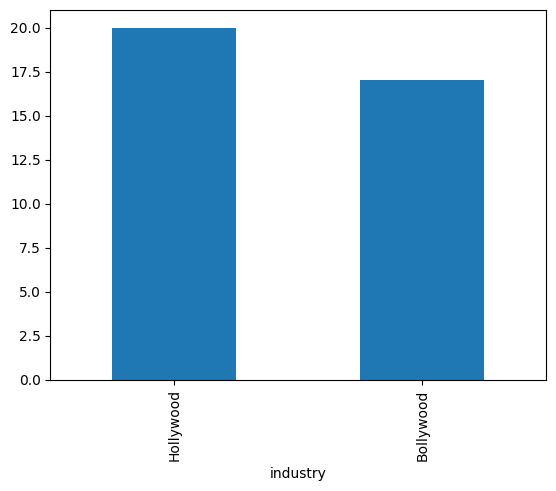

In [31]:
df_movie_fin_merge['industry'].value_counts().plot(kind='bar')

In [33]:
g = df_movie_fin_merge.groupby('industry')['revenue_M_Inr'].sum()
g

industry
Bollywood      80909.0
Hollywood    1430498.3
Name: revenue_M_Inr, dtype: float64

<Axes: ylabel='industry'>

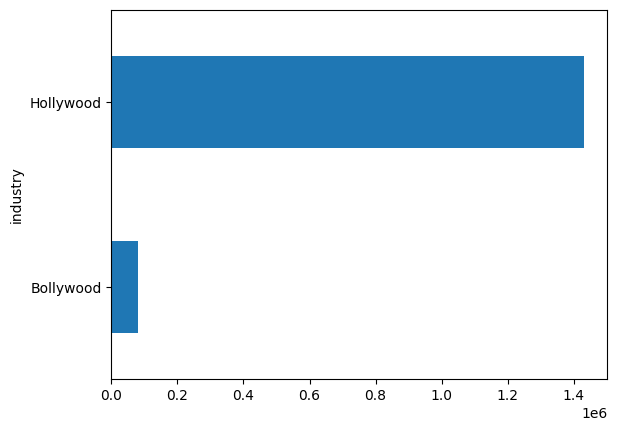

In [40]:
g.plot(kind='barh')

**Join**

In [42]:
query = """
select m.movie_id,m.title,f.budget,f.revenue,f.currency,f.unit
from moviesdb.movies m
join moviesdb.financials f on m.movie_id = f.movie_id
"""
df_movie_fin = pd.read_sql(query,engine)
df_movie_fin.shape

(37, 6)

In [7]:
query = """
select m.movie_id,m.title,f.budget,f.revenue,f.currency,f.unit
from moviesdb.movies m
left join moviesdb.financials f on m.movie_id = f.movie_id
union 
select f.movie_id,m.title,f.budget,f.revenue,f.currency,f.unit
from moviesdb.movies m
right join moviesdb.financials f on m.movie_id = f.movie_id
"""
df_movie_fin = pd.read_sql(query,engine)
df_movie_fin.shape

(42, 6)

In [8]:
query = """
select m.movie_id,m.title,f.budget,f.revenue,f.currency,f.unit
from moviesdb.movies m
left join moviesdb.financials f on m.movie_id = f.movie_id
"""
df_movie_fin_left = pd.read_sql(query,engine)
df_movie_fin_left.shape

(39, 6)

In [9]:
query = """
select f.movie_id,m.title,f.budget,f.revenue,f.currency,f.unit
from moviesdb.movies m
right join moviesdb.financials f on m.movie_id = f.movie_id
"""
df_movie_fin_right = pd.read_sql(query,engine)
df_movie_fin_right.shape

(40, 6)

In [10]:
df_movie_concat = pd.concat([df_movie_fin_left,df_movie_fin_right],axis=1)
df_movie_concat.shape

(40, 12)

In [11]:
df_movie_merge = pd.merge(df_movie_fin_left,df_movie_fin_right,on='movie_id')
print(df_movie_merge.shape)

(37, 11)


**Complex Queries**

subquery

In [12]:
# return single value in where condition
query = """
select * from moviesdb.movies 
where imdb_rating = (select max(imdb_rating) from moviesdb.movies)
"""
df_movie_fin_right = pd.read_sql(query,engine)
df_movie_fin_right.head()

,movie_id,title,industry,release_year,imdb_rating,studio,language_id
0,111,The Shawshank Redemption,Hollywood,1994,9.3,Castle Rock Entertainment,5


In [13]:
# return multipule value in where condition
query = """
select * from moviesdb.movies 
where imdb_rating In (
(select max(imdb_rating) from moviesdb.movies) , 
(select min(imdb_rating) from moviesdb.movies)
);
"""
df_movie_fin_right = pd.read_sql(query,engine)
df_movie_fin_right.head()

,movie_id,title,industry,release_year,imdb_rating,studio,language_id
0,111,The Shawshank Redemption,Hollywood,1994,9.3,Castle Rock Entertainment,5
1,139,Race 3,Bollywood,2018,1.9,Salman Khan Films,1


In [14]:
# return multipule value in where condition
query = """
select *,
Year(current_date())-birth_year as age
 from moviesdb.actors
"""
df_actors = pd.read_sql(query,engine)
df_actors.head()

,actor_id,name,birth_year,age
0,50,Yash,1986,37
1,51,Sanjay Dutt,1959,64
2,52,Benedict Cumberbatch,1976,47
3,53,Elizabeth Olsen,1989,34
4,54,Chris Hemsworth,1983,40


co-related query

In [15]:
# join
query = """
select ma.actor_id,a.name,count(ma.movie_id) as movie_count
from moviesdb.movie_actor as ma
left join moviesdb.actors a on a.actor_id = ma.actor_id
group by ma.actor_id,a.name 
order by movie_count desc
"""
df_actors = pd.read_sql(query,engine)
df_actors.head()

,actor_id,name,movie_count
0,54,Chris Hemsworth,5
1,95,Chris Evans,4
2,61,Aamir Khan,3
3,51,Sanjay Dutt,2
4,59,Shah Rukh Khan,2


In [16]:
#co-related query
query = """
select m.movie_id,m.title,
(
select count(*) from movie_actor where movie_id = m.movie_id
) as actors_count
from moviesdb.movies m
order by actors_count desc
"""
df_actors = pd.read_sql(query,engine)
df_actors.head()

,movie_id,title,actors_count
0,108,3 Idiots,3
1,109,Kabhi Khushi Kabhie Gham,3
2,103,Thor: The Dark World,3
3,125,Avengers: Endgame,3
4,126,Avengers: Infinity War,3


CTE

In [17]:
#co-related query
query = """
with cte1 as (
SELECT *,
(revenue - budget) as pct,
if(currency = 'USD',revenue*77,revenue) as revenue_inr
FROM moviesdb.financials
)select *,
(CASE
WHEN unit = 'Billions' then revenue_inr * 1000
when unit = 'Thousands' then revenue_inr/1000
else revenue_inr end) as revenue_mln
from cte1;
"""
df_actors = pd.read_sql(query,engine)
df_actors.head()

,movie_id,budget,revenue,unit,currency,pct,revenue_inr,revenue_mln
0,101,1.0,12.5,Billions,INR,11.5,12.5,12500.0
1,102,200.0,954.8,Millions,USD,754.8,73519.6,73519.6
2,103,165.0,644.8,Millions,USD,479.8,49649.6,49649.6
3,104,180.0,854.0,Millions,USD,674.0,65758.0,65758.0
4,105,250.0,670.0,Millions,USD,420.0,51590.0,51590.0
